Midsem Project Evaluation (BaseLine Model) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
torch.cuda.is_available()

True

Data Extraction

In [3]:
df_hindi1 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_hi_l1.csv")
df_hindi2 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_hi_l2.csv")
df_english1 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_en_l1.csv")
df_english2 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_en_l2.csv")
df_tamil1 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_ta_l1.csv")
df_tamil2 = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/training/train_ta_l2.csv")

In [4]:
df_hindi1_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_hi_l1.csv")
df_hindi2_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_hi_l2.csv")

In [5]:

df_english1_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_en_l1.csv")
df_english2_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_en_l2.csv")
df_tamil1_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_ta_l1.csv")
df_tamil2_test = pd.read_csv("/kaggle/input/uli-dataset/uli_dataset/testing/test_ta_l2.csv")

In [6]:
df_hindi1_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,hi_a1,hi_a2,hi_a3,hi_a4,hi_a5
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,question_1,NaN,0.0,0.0,0.0,NaN
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,question_1,NaN,0.0,0.0,0.0,NaN
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,question_1,0.0,0.0,0.0,NaN,NaN
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,question_1,NaN,1.0,1.0,0.0,NaN
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",question_1,0.0,NaN,1.0,0.0,NaN


In [7]:
def mergeDF(df1, df2):
    arr = df1.columns.values
    hi_dict = {}
    for i in range(len(df1)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (str(df1[arr[2+j]][i]) == '1.0'):
                count1 += 1
            elif (str(df1[arr[2+j]][i]) == '0.0'):
                count0 += 1
                
        if (count1 > count0):
            hi_dict[df1['text'][i]] = 1
        elif (count0 > count1):
            hi_dict[df1['text'][i]] = 0

    for i in range(len(df2)):
        count1 = 0
        count0 = 0
        for j in range(len(arr)-2):
            if (str(df2[arr[2+j]][i]) == '1.0'):
                count1 += 1
            elif (str(df2[arr[2+j]][i]) == '0.0'):
                count0 += 1
        if (count1 > count0):
            hi_dict[df2['text'][i]] = 1
        elif (count0 > count1 and (df2['text'][i] not in hi_dict)):
            hi_dict[df2['text'][i]] = 0
    df = pd.DataFrame(list(hi_dict.items()), columns=["Text", "Label"])
    return df

In [8]:
df_hindi = mergeDF(df_hindi1,df_hindi2)
df_tamil = mergeDF(df_tamil1,df_tamil2)
df_english = mergeDF(df_english1,df_english2)


In [9]:
df_tamil1_test.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,text,key,ta_a1,ta_a2,ta_a3,ta_a4,ta_a5,ta_a6
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,question_1,NaN,NaN,0.0,0.0,NaN,0.0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,question_1,0.0,NaN,1.0,0.0,NaN,NaN
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,question_1,0.0,0.0,0.0,NaN,NaN,NaN
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,question_1,0.0,NaN,0.0,0.0,0.0,0.0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,question_1,1.0,0.0,NaN,0.0,NaN,NaN


In [10]:
df_hindi_test = mergeDF(df_hindi1_test,df_hindi2_test)
df_tamil_test = mergeDF(df_tamil1_test,df_tamil2_test)
df_english_test = mergeDF(df_english1_test,df_english2_test)

In [11]:
df_tamil_test.head()

,Text,Label
0,வைரமுத்து ஒரு காம மிருகம் என்பது சினிமா துற...,0
1,#4YrsOfValiantVIVEGAM #Valimai #AjithKumar ...,1
2,#AmbedkarBlueShirtRally இந்த போராட்டத்துக்கு ...,0
3,#BREAKING | திருச்சி மாவட்டம் மணப்பாறையை அடுத...,0
4,#Bachelor 😤😤😤😤😤படமாடா இது கோத்தா <handle repla...,0


EDA

In [12]:
df_hindi.head()

,Text,Label
0,भारत में तीन किसान कानून बिल वापस लेने पर भक...,0
1,राजस्थान अजीबोगरीब: गांव की खुशहाली के लिए ...,1
2,सलमान ने की राखी के विरोधी की वकालत तो 'आइटम...,0
3,!!हर शब्द अमॄतम!! पुरानी एक कहावत है... टूटी ...,0
4,"""PM मोदी जी "" की माँ के लिए अपशब्द कहने वाला द...",1


In [13]:
df_english.head()

,Text,Label
0,"This is our history . For Shia and Sunni ,...",0
1,"If this is ""grilling"" then wht wud u call t...",1
2,look at <handle replaced>madam. Locals attac...,0
3,our beloved yogi ji has given money home and...,1
4,"""I gonna kill that bitch"" Bitvj imma kill you...",1


In [14]:
df_tamil.head()

,Text,Label
0,*1. முரசொலி அலுவலகம் அமைந்துள்ள இடம் பஞ்சமி...,0
1,சோத்துக்கு பிச்சை எடுக்கிற கடங்கார நாய்களுக...,0
2,தத்தபுத்த தத்தபுத்த ன்னு எதாவது புரியுதா,0
3,பச்சை மொளகா காரம் vicky அம்மா புண்டை நாறும் 😆,1
4,என்ன உடம்பு டா சாமி- சும்மா வளுவளுனு.. முலை ...,1


In [15]:
df_hindi_test.head()

,Text,Label
0,#BandraStation #SharadPawar #Muradabad अगर अभ...,1
1,#ConspiracyAgainstIndia सुन लो रे देश के गद्द...,1
2,#MarathaReservation : महाराष्ट्र में जश्न का म...,1
3,#RheaChakraborty aap Mahesh bhatt se madad kiy...,1
4,"#SecularMaskOfd हमे पता नहि क्या कहते है ,इतना...",0


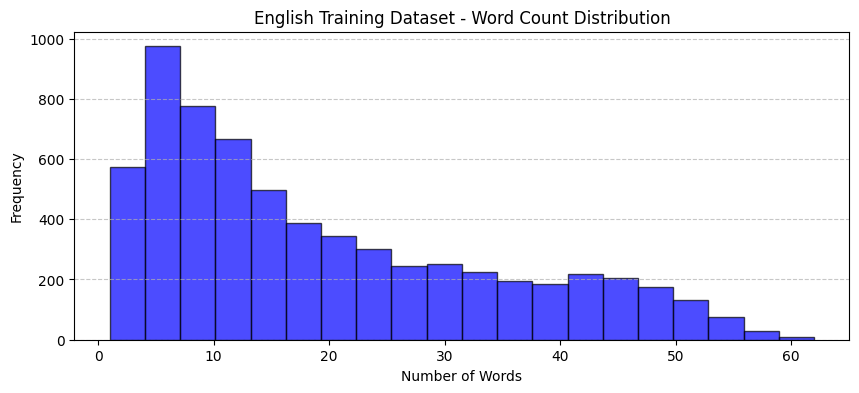

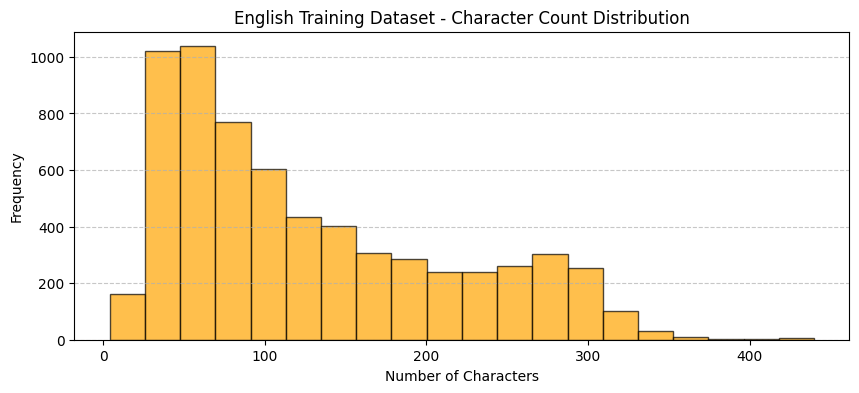

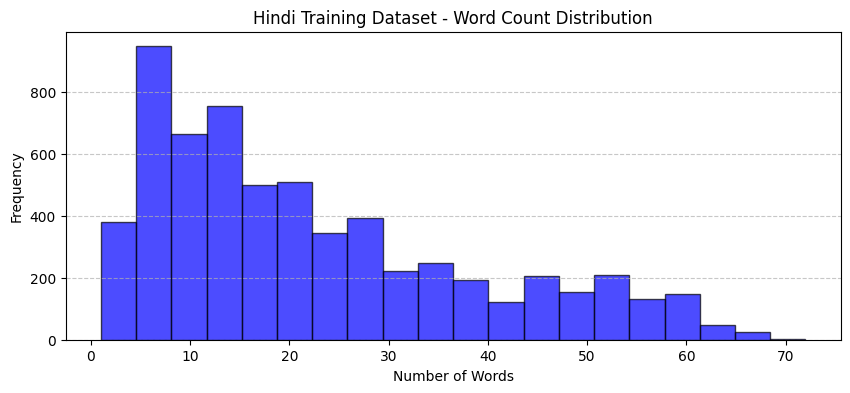

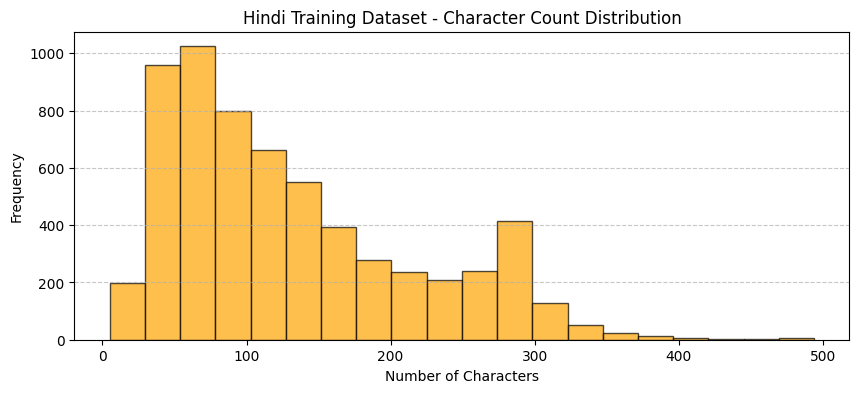

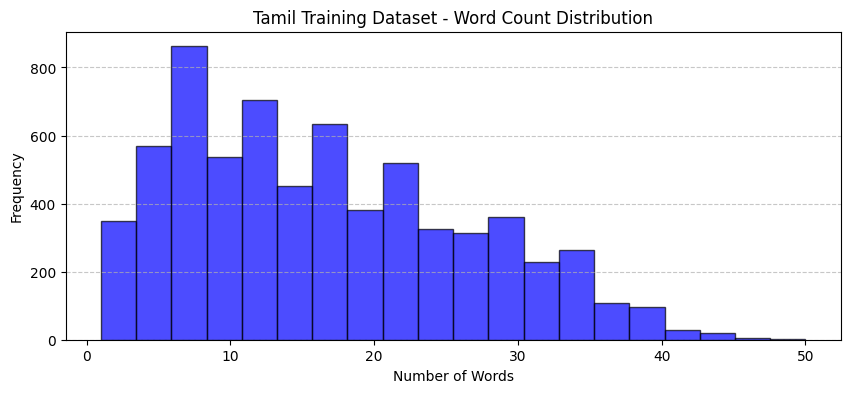

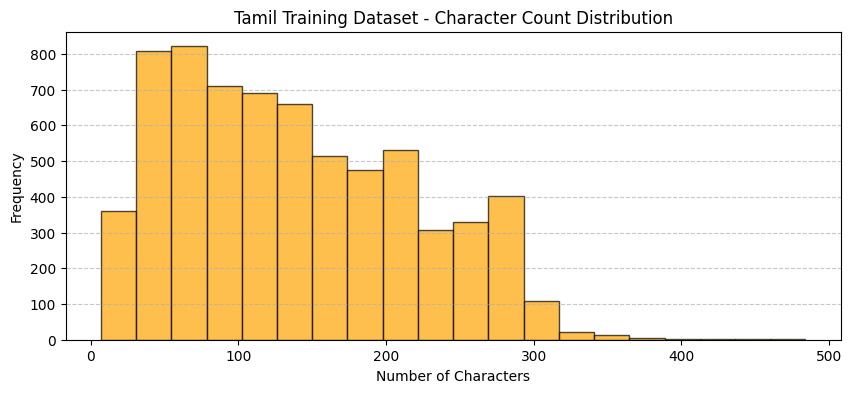

In [16]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Training Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 6465 samples
Label
0    4443
1    2022
Name: count, dtype: int64

Hindi Dataset: 6195 samples
Label
1    3392
0    2803
Name: count, dtype: int64

Tamil Dataset: 6761 samples
Label
1    3741
0    3020
Name: count, dtype: int64


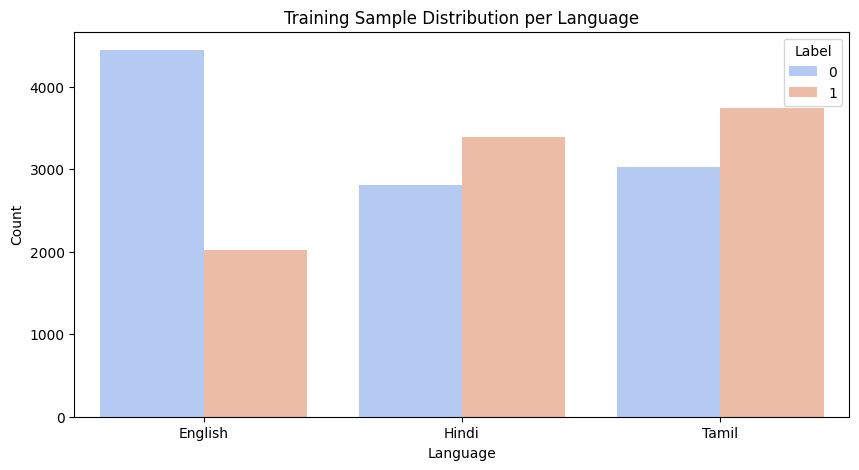

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english, 'Hindi': df_hindi, 'Tamil': df_tamil}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Training Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


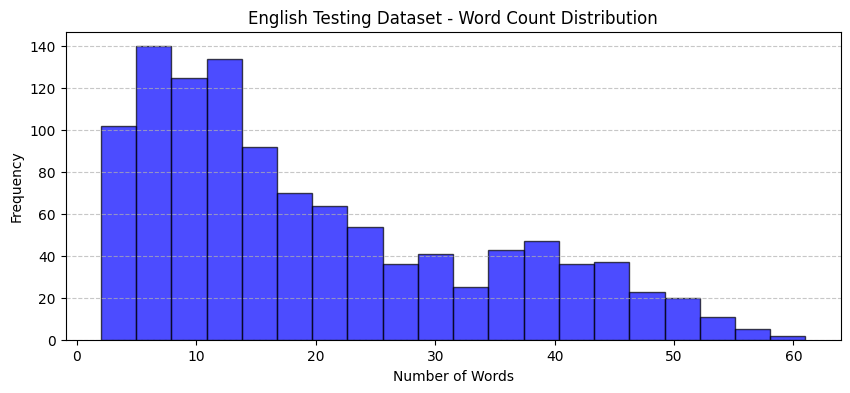

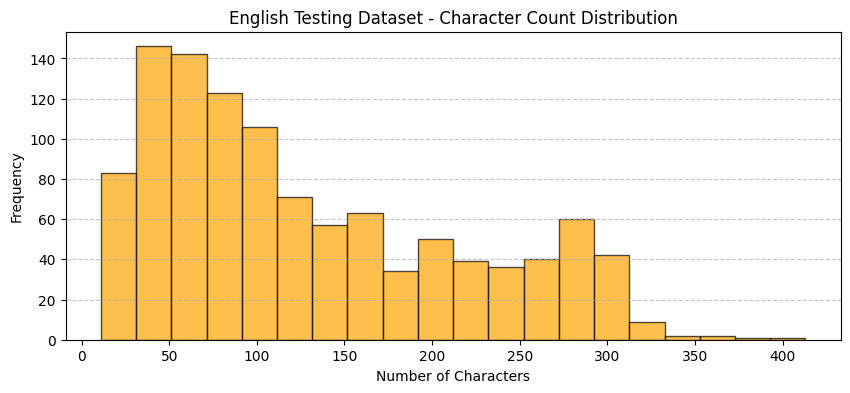

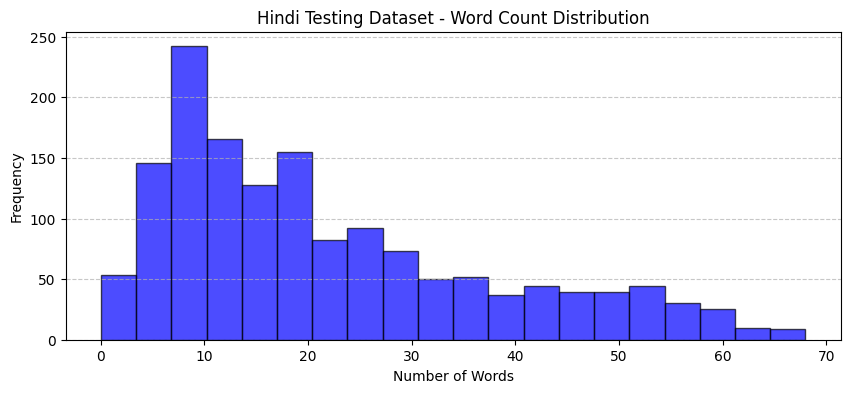

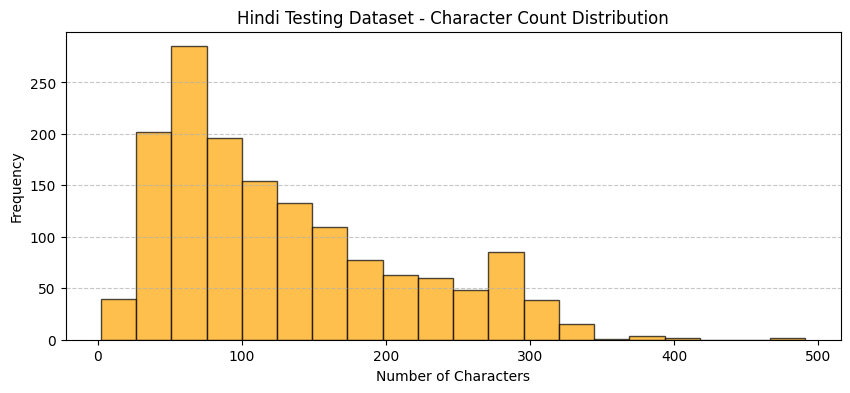

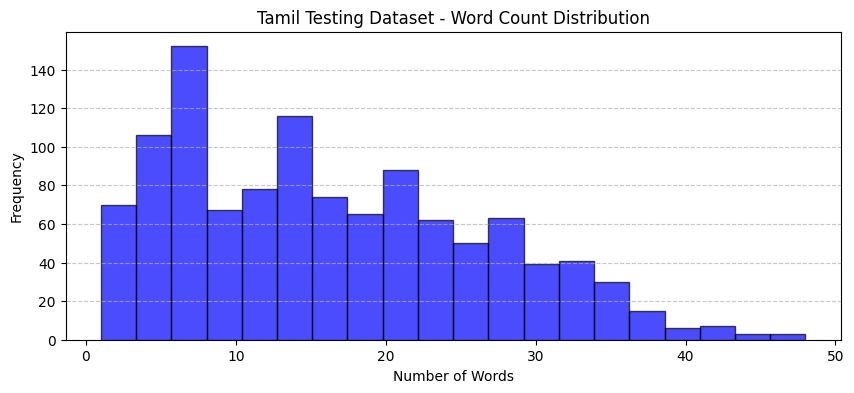

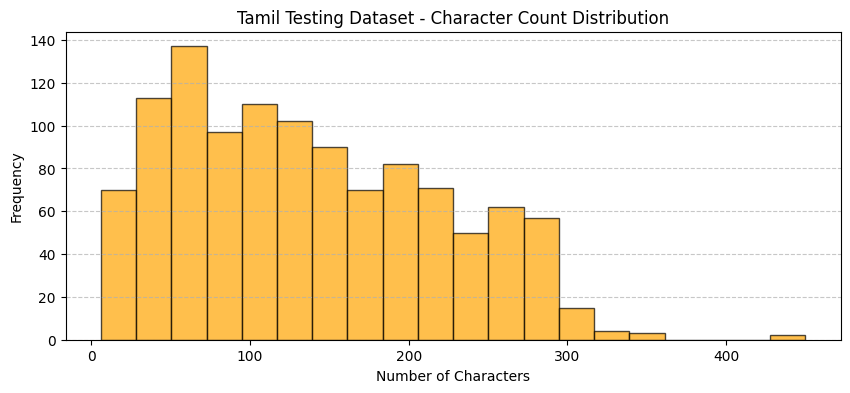

In [18]:
import matplotlib.pyplot as plt

# Define a dictionary with language names and their DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

for lang, df in dfs.items():
    df = df.copy()  # Ensure modifications don't affect the original DataFrame

    # Calculate word and character counts
    df['word_count'] = df['Text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['Text'].apply(lambda x: len(str(x)))

    # Plot Word Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['word_count'], bins=20, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Word Count Distribution")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Plot Character Count Distribution
    plt.figure(figsize=(10, 4))
    plt.hist(df['char_count'], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"{lang} Testing Dataset - Character Count Distribution")
    plt.xlabel("Number of Characters")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



English Dataset: 1107 samples
Label
0    709
1    398
Name: count, dtype: int64

Hindi Dataset: 1516 samples
Label
1    857
0    659
Name: count, dtype: int64

Tamil Dataset: 1135 samples
Label
1    683
0    452
Name: count, dtype: int64


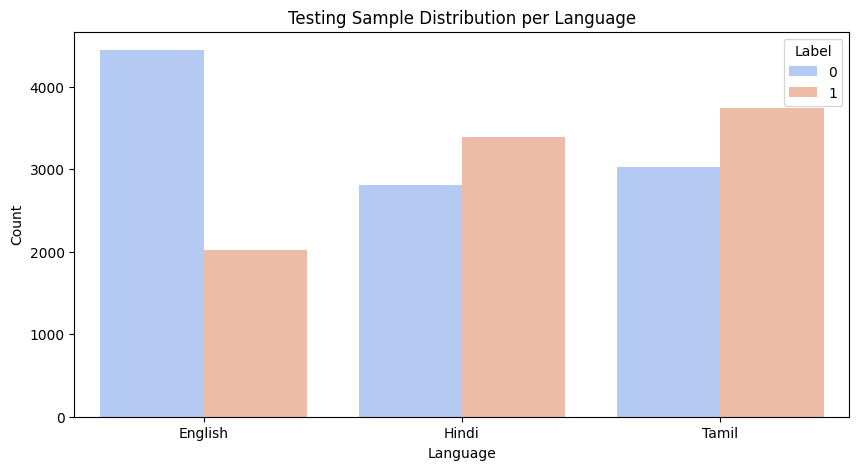

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a dictionary with language names and DataFrames
dfs = {'English': df_english_test, 'Hindi': df_hindi_test, 'Tamil': df_tamil_test}

# Count total samples per language and label distribution
for lang, df in dfs.items():
    print(f"\n{lang} Dataset: {len(df)} samples")
    print(df['Label'].value_counts())

# Concatenating all DataFrames using pd.concat()
df_all = pd.concat([
    df_english.assign(Language='English'),
    df_hindi.assign(Language='Hindi'),
    df_tamil.assign(Language='Tamil')
])

# Plot Label Distribution per Language
plt.figure(figsize=(10, 5))
sns.countplot(x="Language", hue="Label", data=df_all, palette="coolwarm")
plt.title("Testing Sample Distribution per Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.legend(title="Label")
plt.show()


In [20]:
# Merge all datasets into one
df_all = pd.concat([
    df_english,
    df_hindi,
    df_tamil
])

print(df_all.head(), "\nTotal Samples:", len(df_all))


                                                Text  Label
0      This is our history . For Shia and Sunni ,...      0
1     If this is "grilling" then wht wud u call t...      1
2    look at <handle replaced>madam. Locals attac...      0
3    our beloved yogi ji has given money home and...      1
4  "I gonna kill that bitch"  Bitvj imma kill you...      1 
Total Samples: 19421


In [21]:
# Merge all datasets into one
df_test = pd.concat([
    df_english_test,
    df_hindi_test,
    df_tamil_test
])

print(df_test.head(), "\nTotal Samples:", len(df_test))

                                                Text  Label
0  "who's this tweet about" bitch it's about you ...      0
1  #AlkaLamba should’ve used her slippers to slap...      0
2  #CoronaVillains  #COVIDIDIOT   #COVID2019 is a...      1
3  (Acts 29:19994) LIKE the female "governors" of...      1
4  ***Let us celebrate “secular” as a beautiful w...      0 
Total Samples: 3758


In [22]:
import re
import unicodedata

# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F700-\U0001F77F"  # Alchemical Symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed Characters
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r' ', text)  # Replace emojis with an empty string

# Function to clean text
def clean_text(text):
    if not isinstance(text, str):
        return ""

    # Normalize Unicode characters (important for Hindi & Tamil)
    text = unicodedata.normalize("NFKC", text)

    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", "", text)

    # Remove emojis
    text = remove_emojis(text)

    # Remove special characters and punctuation
    text = re.sub(r"[^a-zA-Z0-9\u0900-\u097F\u0B80-\u0BFF\s]", "", text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()
    
    return text

# Apply cleaning to the dataset
df_all["Text"] = df_all["Text"].apply(clean_text)

# Show cleaned samples
print(df_all[["Text"]].head(10))


                                                Text
0  this is our history for shia and sunni dont li...
1  if this is grilling then wht wud u call th stu...
2  look at handle replacedmadam locals attacked n...
3  our beloved yogi ji has given money home and f...
4  i gonna kill that bitch bitvj imma kill you we...
5  in america where the genuine englishman no lon...
6  in the earlier decades the rallying cry of the...
7  those who do not learn from history are doomed...
8  blank is blank cultureexperience me literally ...
9                   cannot even burn the effigy lmao


In [23]:
# Apply cleaning to the dataset
df_test["Text"] = df_test["Text"].apply(clean_text)

# Show cleaned samples
print(df_test[["Text"]].head(10))

                                                Text
0  whos this tweet about bitch its about you fuck...
1  alkalamba shouldve used her slippers to slap t...
2  coronavillains covididiot covid2019 is a pande...
3  acts 2919994 like the female governors of stat...
4  let us celebrate secular as a beautiful word t...
5  trigger warning mention of rpe the ultimate go...
6                      16 fuck me like a cheap whore
7  1st handle replaceds actofstupidity then comes...
8  handle replaced handle replaced wanna do a act...
9  handle replaced not many women are accomplishe...


In [24]:
df_train = df_all.copy()
df_test = df_test.copy()

In [25]:
df_train.head(30)

,Text,Label
0,this is our history for shia and sunni dont li...,0
1,if this is grilling then wht wud u call th stu...,1
2,look at handle replacedmadam locals attacked n...,0
3,our beloved yogi ji has given money home and f...,1
4,i gonna kill that bitch bitvj imma kill you we...,1
5,in america where the genuine englishman no lon...,0
6,in the earlier decades the rallying cry of the...,0
7,those who do not learn from history are doomed...,0
8,blank is blank cultureexperience me literally ...,0
9,cannot even burn the effigy lmao,0


In [26]:
df_test.head(30)

,Text,Label
0,whos this tweet about bitch its about you fuck...,0
1,alkalamba shouldve used her slippers to slap t...,0
2,coronavillains covididiot covid2019 is a pande...,1
3,acts 2919994 like the female governors of stat...,1
4,let us celebrate secular as a beautiful word t...,0
5,trigger warning mention of rpe the ultimate go...,0
6,16 fuck me like a cheap whore,1
7,1st handle replaceds actofstupidity then comes...,1
8,handle replaced handle replaced wanna do a act...,0
9,handle replaced not many women are accomplishe...,0


In [27]:
# Install necessary libraries if not already installed
!pip install transformers datasets scikit-learn nltk torch numpy pandas matplotlib seaborn

In [28]:
 pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm

In [30]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
class MultilingualTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        
        # Tokenize the text
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=True,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [32]:
class GenderAbuseDetectionModel(nn.Module):
    def __init__(self, pretrained_model, num_classes=2, dropout_rate=0.3):
        super(GenderAbuseDetectionModel, self).__init__()
        
        # Load pre-trained model as base encoder
        self.encoder = pretrained_model
        
        # Get the hidden size from the encoder
        hidden_size = self.encoder.config.hidden_size
        
        # Feature extractor layers
        self.conv1 = nn.Conv1d(hidden_size, 256, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(256, 128, kernel_size=3, padding=1)
        
        # Pooling layers
        self.max_pool = nn.AdaptiveMaxPool1d(1)
        self.avg_pool = nn.AdaptiveAvgPool1d(1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, num_classes)
        
        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)
        
        # Layer normalization
        self.layer_norm = nn.LayerNorm(256)
        
    def forward(self, input_ids, attention_mask, token_type_ids):
        # Get encoder outputs
        outputs = self.encoder(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            return_dict=True
        )
        
        # Get sequence output from the encoder
        sequence_output = outputs.last_hidden_state  # Shape: (batch_size, seq_len, hidden_size)
        
        # Transpose for Conv1d which expects (batch_size, hidden_size, seq_len)
        x = sequence_output.transpose(1, 2)  # Shape: (batch_size, hidden_size, seq_len)
        
        # Apply convolution layers
        x1 = F.relu(self.conv1(x))  # Shape: (batch_size, 256, seq_len)
        x1 = F.relu(self.conv2(x1))  # Shape: (batch_size, 128, seq_len)
        
        # Apply pooling
        max_pooled = self.max_pool(x1).squeeze(-1)  # Shape: (batch_size, 128)
        avg_pooled = self.avg_pool(x1).squeeze(-1)  # Shape: (batch_size, 128)
        
        # Concatenate pooled features
        concat_features = torch.cat([max_pooled, avg_pooled], dim=1)  # Shape: (batch_size, 256)
        
        # Apply layer normalization
        normalized_features = self.layer_norm(concat_features)
        
        # Apply fully connected layers with dropout
        x = F.relu(self.fc1(normalized_features))
        x = self.dropout(x)
        logits = self.fc2(x)
        
        return logits

In [33]:
from transformers import AutoTokenizer, AutoModel

# We need a multilingual model for our task, as we have data in multiple languages
model_name = "xlm-roberta-base"  # Multilingual transformer model
tokenizer = AutoTokenizer.from_pretrained(model_name)
base_model = AutoModel.from_pretrained(model_name)

# Combine all data
# Assuming df_hindi, df_tamil, df_english are already available from your code.ipynb
all_data = pd.concat([df_hindi, df_tamil, df_english], ignore_index=True)

# Check the distribution
print("Total examples:", len(all_data))
print("Label distribution:", all_data["Label"].value_counts())

# Split into train and validation
train_df, val_df = train_test_split(all_data, test_size=0.2, stratify=all_data["Label"], random_state=42)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Total examples: 19421
Label distribution: Label
0    10266
1     9155
Name: count, dtype: int64
Training set size: 15536
Validation set size: 3885


In [34]:
# Create datasets
train_dataset = MultilingualTextDataset(
    texts=train_df["Text"].values,
    labels=train_df["Label"].values,
    tokenizer=tokenizer
)

val_dataset = MultilingualTextDataset(
    texts=val_df["Text"].values,
    labels=val_df["Label"].values,
    tokenizer=tokenizer
)

# Create dataloaders
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# Initialize the custom model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = GenderAbuseDetectionModel(base_model)
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

# Define learning rate scheduler
from transformers import get_scheduler
num_epochs = 5
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)

Using device: cuda


In [35]:
# Training and evaluation functions
def train_epoch(model, dataloader, optimizer, criterion, scheduler, device):
    model.train()
    total_loss = 0
    
    progress_bar = tqdm(dataloader, desc="Training")
    
    for batch in progress_bar:
        # Get inputs
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        token_type_ids = batch['token_type_ids'].to(device)
        labels = batch['label'].to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids, attention_mask, token_type_ids)
        
        # Calculate loss
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        # Backward pass
        loss.backward()
        
        # Clip gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update weights
        optimizer.step()
        scheduler.step()
        
        # Update progress bar
        progress_bar.set_postfix({'loss': loss.item()})
    
    return total_loss / len(dataloader)

def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            # Get inputs
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            token_type_ids = batch['token_type_ids'].to(device)
            labels = batch['label'].to(device)
            
            # Forward pass
            outputs = model(input_ids, attention_mask, token_type_ids)
            
            # Calculate loss
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            # Get predictions
            _, preds = torch.max(outputs, dim=1)
            
            # Store predictions and labels
            all_preds.extend(preds.cpu().tolist())
            all_labels.extend(labels.cpu().tolist())
    
    # Calculate metrics
    acc = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, digits=4)
    
    return total_loss / len(dataloader), acc, report, all_preds, all_labels

In [36]:
# Training loop
train_losses = []
val_losses = []
val_accs = []

best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    # Train
    train_loss = train_epoch(model, train_dataloader, optimizer, criterion, lr_scheduler, device)
    train_losses.append(train_loss)
    
    # Evaluate
    val_loss, val_acc, val_report, _, _ = evaluate(model, val_dataloader, criterion, device)
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}")
    print("Classification Report:\n", val_report)
    
    # Save best model
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        # Save the model
        torch.save(model.state_dict(), "best_gender_abuse_detector.pt")
        print("Saved best model!")


Epoch 1/5


Evaluating: 100%|██████████| 243/243 [00:31<00:00,  7.72it/s]


Train Loss: 0.6059
Val Loss: 0.5387, Val Accuracy: 0.7323
Classification Report:
               precision    recall  f1-score   support

           0     0.7224    0.8019    0.7600      2054
           1     0.7464    0.6543    0.6973      1831

    accuracy                         0.7323      3885
   macro avg     0.7344    0.7281    0.7287      3885
weighted avg     0.7337    0.7323    0.7305      3885

Saved best model!

Epoch 2/5


Evaluating: 100%|██████████| 243/243 [00:31<00:00,  7.75it/s]


Train Loss: 0.5398
Val Loss: 0.5256, Val Accuracy: 0.7431
Classification Report:
               precision    recall  f1-score   support

           0     0.7697    0.7337    0.7512      2054
           1     0.7161    0.7537    0.7344      1831

    accuracy                         0.7431      3885
   macro avg     0.7429    0.7437    0.7428      3885
weighted avg     0.7444    0.7431    0.7433      3885

Saved best model!

Epoch 3/5


Evaluating: 100%|██████████| 243/243 [00:31<00:00,  7.68it/s]


Train Loss: 0.4926
Val Loss: 0.5410, Val Accuracy: 0.7423
Classification Report:
               precision    recall  f1-score   support

           0     0.7615    0.7463    0.7539      2054
           1     0.7217    0.7378    0.7297      1831

    accuracy                         0.7423      3885
   macro avg     0.7416    0.7421    0.7418      3885
weighted avg     0.7428    0.7423    0.7425      3885


Epoch 4/5


Evaluating: 100%|██████████| 243/243 [00:31<00:00,  7.69it/s]


Train Loss: 0.4445
Val Loss: 0.5730, Val Accuracy: 0.7459
Classification Report:
               precision    recall  f1-score   support

           0     0.7696    0.7415    0.7553      2054
           1     0.7214    0.7510    0.7359      1831

    accuracy                         0.7459      3885
   macro avg     0.7455    0.7462    0.7456      3885
weighted avg     0.7469    0.7459    0.7461      3885

Saved best model!

Epoch 5/5


Evaluating: 100%|██████████| 243/243 [00:31<00:00,  7.67it/s]

Train Loss: 0.4007
Val Loss: 0.5868, Val Accuracy: 0.7426
Classification Report:
               precision    recall  f1-score   support

           0     0.7689    0.7337    0.7509      2054
           1     0.7158    0.7526    0.7338      1831

    accuracy                         0.7426      3885
   macro avg     0.7424    0.7431    0.7423      3885
weighted avg     0.7439    0.7426    0.7428      3885



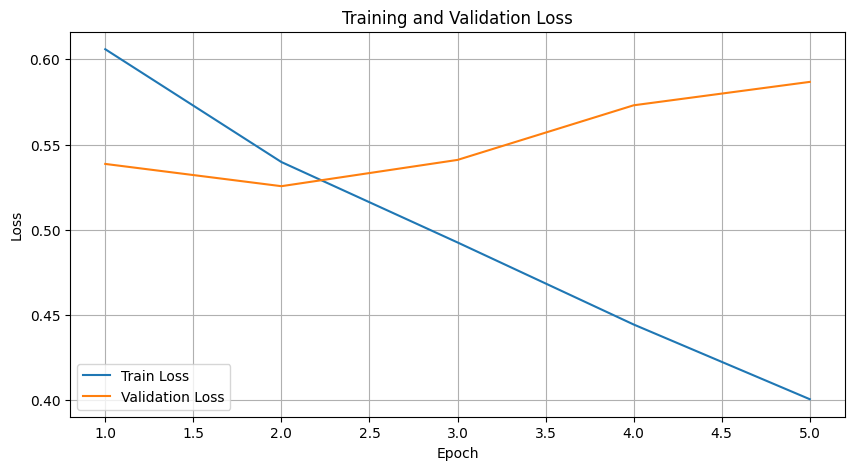

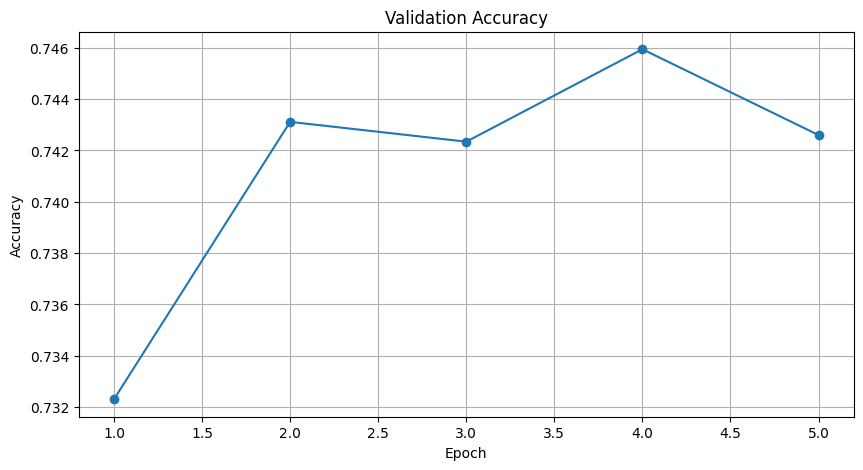

In [37]:
# Visualize training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Visualize validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), val_accs, label='Validation Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.grid(True)
plt.show()

<ipython-input-38-bcb214ba35e1>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_gender_abuse_detector.pt"))
Evaluating: 100%|████████

Test Loss: 0.5112, Test Accuracy: 0.7712
Test Classification Report:
               precision    recall  f1-score   support

           0     0.7510    0.7890    0.7696      1820
           1     0.7920    0.7544    0.7727      1938

    accuracy                         0.7712      3758
   macro avg     0.7715    0.7717    0.7711      3758
weighted avg     0.7722    0.7712    0.7712      3758



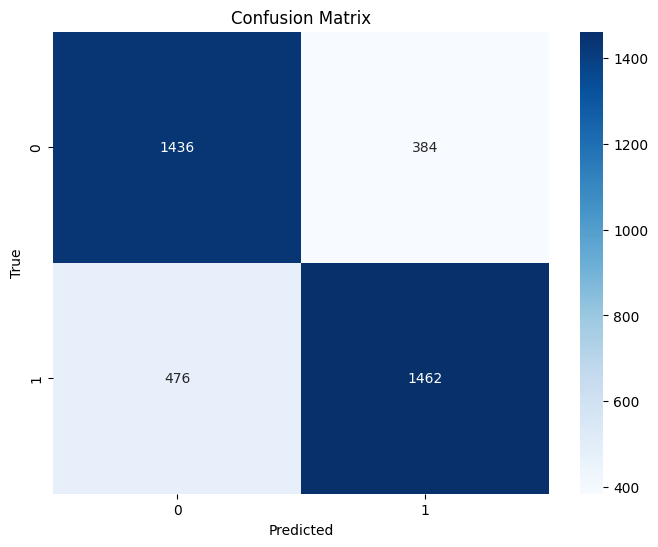

In [38]:
# Load the best model
model.load_state_dict(torch.load("best_gender_abuse_detector.pt"))

# Evaluate on test data (assuming df_hindi_test, df_tamil_test, df_english_test exists)
test_data = pd.concat([df_hindi_test, df_tamil_test, df_english_test], ignore_index=True)

# Create test dataset
test_dataset = MultilingualTextDataset(
    texts=test_data["Text"].values,
    labels=test_data["Label"].values,
    tokenizer=tokenizer
)

test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Evaluate on test set
test_loss, test_acc, test_report, all_preds, all_labels = evaluate(model, test_dataloader, criterion, device)

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")
print("Test Classification Report:\n", test_report)

# Plot confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Function to predict abuse in new text
def predict_abuse(text, model, tokenizer, device):
    model.eval()
    
    # Tokenize the text
    encoding = tokenizer(
        text,
        add_special_tokens=True,
        max_length=128,
        return_token_type_ids=True,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    token_type_ids = encoding['token_type_ids'].to(device)
    
    # Get prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask, token_type_ids)
        _, preds = torch.max(outputs, dim=1)
    
    return preds.item()

# Test the function with some examples
test_texts = [
    "You are so beautiful and smart",  # Non-abusive
    "Women should stay in the kitchen",  # Abusive 
    "अच्छा काम किया है तुमने",  # Non-abusive Hindi
    "औरतों की जगह घर में है",  # Potentially abusive Hindi
    "நீங்கள் மிகவும் திறமையானவர்",  # Non-abusive Tamil
    "பெண்கள் வீட்டிலேயே இருக்க வேண்டும்",  # Potentially abusive Tamil
    "Women do not deserve equal rights like men"
]

for text in test_texts:
    prediction = predict_abuse(text, model, tokenizer, device)
    print(f"Text: {text}")
    print(f"Prediction: {'Abusive' if prediction == 1 else 'Non-abusive'}")
    print("-" * 50)

Text: You are so beautiful and smart
Prediction: Non-abusive
--------------------------------------------------
Text: Women should stay in the kitchen
Prediction: Non-abusive
--------------------------------------------------
Text: अच्छा काम किया है तुमने
Prediction: Non-abusive
--------------------------------------------------
Text: औरतों की जगह घर में है
Prediction: Abusive
--------------------------------------------------
Text: நீங்கள் மிகவும் திறமையானவர்
Prediction: Non-abusive
--------------------------------------------------
Text: பெண்கள் வீட்டிலேயே இருக்க வேண்டும்
Prediction: Non-abusive
--------------------------------------------------
Text: Women do not deserve equal rights like men
Prediction: Abusive
--------------------------------------------------
